# Aprendizagem - Homework II
### II. Programming - Grupo99
(ist1106059, ist1106329)

1- 

In [9]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart-disease.csv')

# separar features do target
x = df.drop(columns=['target'])
y = df['target']

# inicializar 5-fold stratified cross-validation com shuffling
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# inicializar modelos kNN e naive Bayes
kNN = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()

kNN_accuracies = []
naive_bayes_accuracies = []

for train_idx, test_idx in strat_k_fold.split(x, y):
  x_train = x.iloc[train_idx]
  y_train = y.iloc[train_idx]
  
  x_test = x.iloc[test_idx]
  y_test = y.iloc[test_idx]

  # Standardize the data ???????????????????????
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  # kNN model
  kNN.fit(x_train, y_train)
  y_predictions_kNN = kNN.predict(x_test)
  kNN_accuracies.append(accuracy_score(y_test, y_predictions_kNN))

  # Naive Bayes model
  naive_bayes.fit(x_train, y_train)
  y_predictions_naive_bayes = naive_bayes.predict(x_test)
  naive_bayes_accuracies.append(accuracy_score(y_test, y_predictions_naive_bayes))


a) 

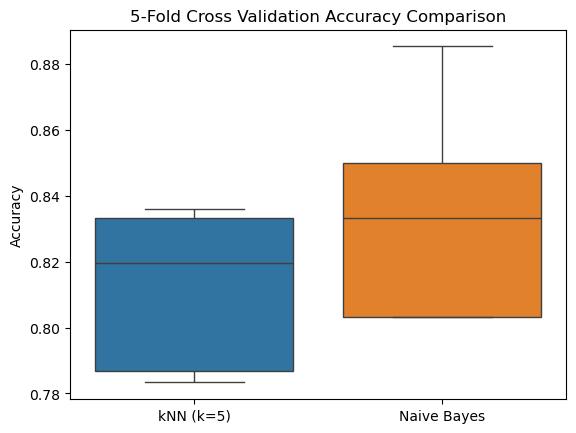

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=[kNN_accuracies, naive_bayes_accuracies])
plt.xticks([0, 1], ['kNN (k=5)', 'Naive Bayes'])
plt.title('5-Fold Cross Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

b)

0.8184153005464483
0.8350273224043716


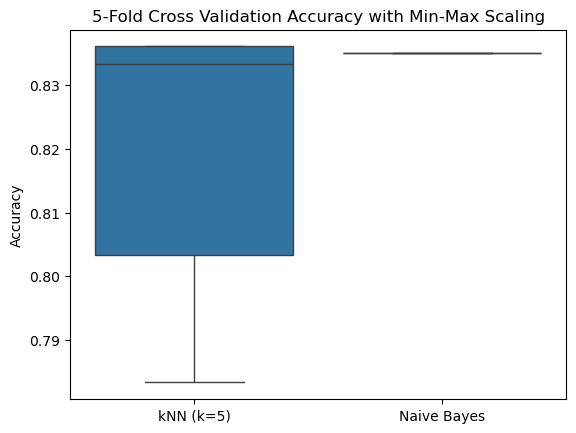

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

kNN_accuracies_minmax = []
naive_bayes_accuracies_minmax = []

for train_idx, test_idx in strat_k_fold.split(x, y):
  x_train = x.iloc[train_idx]
  y_train = y.iloc[train_idx]
  
  x_test = x.iloc[test_idx]
  y_test = y.iloc[test_idx]

  # Standardize the data ???????????????????????
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  # kNN model
  kNN.fit(x_train, y_train)
  y_predictions_kNN = kNN.predict(x_test)
  kNN_accuracies_minmax.append(accuracy_score(y_test, y_predictions_kNN))

  # Naive Bayes model
  naive_bayes.fit(x_train, y_train)
  y_predictions_naive_bayes = naive_bayes.predict(x_test)
  naive_bayes_accuracies_minmax.append(accuracy_score(y_test, y_predictions_naive_bayes))

# Report average accuracies
kNN_avg_accuracy = np.mean(kNN_accuracies_minmax)
naive_bayes_avg_accuracy = np.mean(naive_bayes_accuracies_minmax)

print(kNN_avg_accuracy)
print(naive_bayes_avg_accuracy)

# Plotting the results
sns.boxplot(data=[kNN_accuracies_minmax, naive_bayes_avg_accuracy])
plt.xticks([0, 1], ['kNN (k=5)', 'Naive Bayes'])
plt.title('5-Fold Cross Validation Accuracy with Min-Max Scaling')
plt.ylabel('Accuracy')
plt.show()